# 1차원 이산 푸리에 변환

In [1]:
import numpy as np, math
import matplotlib.pyplot as plt

In [2]:
def exp(knN):
    th = -2 * math.pi * knN
    return complex(math.cos(th), math.sin(th))              # 복소수 클래스

def dft(g):
    N = len(g)
    dst = [sum(g[n] * exp(k*n/N ) for n in range(N)) for k in range(N) ]
    return np.array(dst)

def idft(g):
    N = len(g)
    dst = [sum(g[n] * exp(-k*n/N) for n in range(N)) for k in range(N) ]
    return np.array(dst) / N

In [3]:
fmax = 1000      # 샘플링 주파수 1000 Hz: 최대주파수의 2배
dt = 1/fmax      # 샘플링 간격
t = np.arange(0, 1, dt)         # 시간 리스트

In [4]:
g1 = np.sin(2*np.pi*50*t)
g2 = np.sin(2*np.pi*120*t)
g3 = np.sin(2*np.pi*260*t)
g = g1 * 0.6 + g2 * 0.9 + g3 * 0.2          # 신호 합성

In [5]:
N = len(g)                          # 신호 길이
df = fmax/N                         #
f = np.arange(0, N, df)
xf = dft(g) * dt                    # 사용자 정의 DFT
g2 = idft(xf) / dt

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


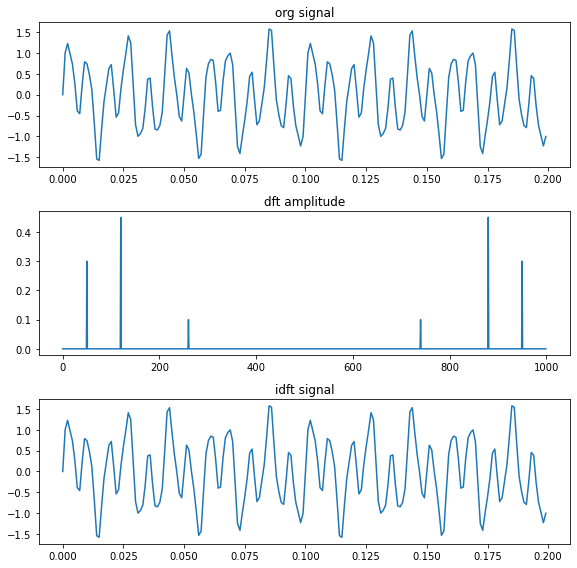

In [6]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,1), plt.plot(t[0:200], g[0:200]), plt.title('org signal')
plt.subplot(3,1,2), plt.plot(f, np.abs(xf) ), plt.title('dft amplitude')
plt.subplot(3,1,3), plt.plot(t[0:200], g2[0:200]), plt.title('idft signal')
plt.tight_layout()
plt.show()

- 푸리에 변환 결과를 보면 그래프의 피크 위치를 통해서 기저 함수의 주파수를 확인할 수 있으며, 피크값을 통해서 기저 함수의 게수를 확인할 수 있다. 또한, 역 푸리에 변환을 통해서 원본 신호를 복구할 수 있다 
- 영상처리에서는 1차원 신호보다는 2차원 영상을 주로 사용한다. 다라서 2차원 영상에 대한 푸리에 변환이 필요하다. 2차원 공간상의 영상에 이산 푸리에 변환을 적용하려면 1차원 이산 푸리에 변환을 가로 방향과 세로 방향으로 연속해서 두 번 적용해야 한다. 